# Machine Learning Basics: Predicting Kubernetes Incidents

## Introduction

Machine Learning (ML) enables computers to learn from data and make predictions without being explicitly programmed. In this notebook, we’ll use ML to predict Kubernetes incidents (e.g., `Normal` vs. `Warning`) based on system metrics like CPU and memory usage.

By the end of this notebook, you will:
- Understand the basics of machine learning and supervised learning.
- Learn how to prepare data for a machine learning model.
- Train and evaluate a simple decision tree model.
- Interpret the model's predictions.

**Why This Matters**:
Predicting incidents can help prevent downtime and improve the efficiency of Kubernetes workloads.

**Instructions**:
- Follow each section sequentially.
- Pay attention to markdown cells that explain each concept and code snippet.

## 1. What is AI and Machine Learning?

### Artificial Intelligence (AI)
AI is the field of computer science that focuses on creating systems capable of performing tasks that typically require human intelligence, such as decision-making, pattern recognition, and problem-solving.

### Machine Learning? (ML)

Machine Learning (ML) is a field of computer science where machines learn patterns from data to make decisions or predictions. It’s like teaching a machine to recognize situations and take appropriate actions based on experience.

### Types of Machine Learning
- **Supervised Learning**: The model learns from labeled data (e.g., predict incidents like `Normal` or `Warning` based on metrics).
- **Unsupervised Learning**: The model identifies patterns in unlabeled data (e.g., detect anomalies).
- **Reinforcement Learning**: The model learns by trial and error (e.g., optimizing a process).

In this notebook, we’ll focus on **supervised learning** to predict Kubernetes incidents.

## 2. Simple Prediction Example

Let’s understand prediction with a simple example. Imagine you’re managing a Kubernetes cluster and observing:
- High CPU allocation efficiency often correlates with incidents (`Warning`).
- Low CPU and memory efficiency usually indicate no incidents (`Normal`).

We’ll use this intuition to create a simple dataset and predict incidents based on these metrics.

In [155]:
# Create a structured in-memory dataset
import pandas as pd

data = {
    "cpu_allocation_efficiency": [0.3, 0.9, 0.5, 0.7, 0.8, 0.2, 0.95, 0.6, 0.4, 0.85],
    "memory_allocation_efficiency": [
        0.4,
        0.85,
        0.3,
        0.75,
        0.9,
        0.2,
        0.95,
        0.65,
        0.5,
        0.8,
    ],
    "event_type": [
        "Normal",
        "Warning",
        "Normal",
        "Warning",
        "Warning",
        "Normal",
        "Warning",
        "Normal",
        "Normal",
        "Warning",
    ],
}

# Create the DataFrame
df_simple = pd.DataFrame(data)

# Display the dataset
df_simple

,cpu_allocation_efficiency,memory_allocation_efficiency,event_type
0,0.30,0.40,Normal
1,0.90,0.85,Warning
2,0.50,0.30,Normal
3,0.70,0.75,Warning
4,0.80,0.90,Warning
5,0.20,0.20,Normal
6,0.95,0.95,Warning
7,0.60,0.65,Normal
8,0.40,0.50,Normal
9,0.85,0.80,Warning


## 3. Splitting the Data: Training and Testing

To train and evaluate the machine learning model:
1. **Training Data**: Used to teach the model (70% of the dataset).
2. **Testing Data**: Used to evaluate the model’s performance on unseen data (30% of the dataset).

This ensures the model learns from one part of the data and is tested on another, preventing overfitting.

In [156]:
# Separate features and target
from sklearn.model_selection import train_test_split

X = df_simple[["cpu_allocation_efficiency", "memory_allocation_efficiency"]]
y = df_simple["event_type"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Show shapes of the splits
X_train.shape, X_test.shape

((7, 2), (3, 2))

## 4. Training a Simple Decision Tree Model

We’ll train a simple decision tree model using the training data. Decision trees work by splitting the data into smaller groups based on the most important features.

For example:
- If CPU allocation efficiency is > 0.8, the incident might be a `Warning`.
- Otherwise, it might be `Normal`.

Let’s train the model and evaluate its performance.

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train the Decision Tree model
simple_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
simple_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = simple_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

## 5. Interpreting a Prediction

Let’s take a single test sample and see how the model predicts the incident type. We’ll display:
1. The input metrics (features).
2. The model’s predicted incident type.
3. The actual incident type.

In [158]:
# Display a single prediction
sample_index = 0
sample_features = X_test.iloc[sample_index]
sample_features_df = pd.DataFrame(
    [sample_features], columns=X_test.columns
)  # Wrap as DataFrame
sample_prediction = simple_tree.predict(sample_features_df)
actual_label = y_test.iloc[sample_index]

print(f"Input Features: {sample_features.to_dict()}")
print(f"Predicted Incident: {sample_prediction[0]}")
print(f"Actual Incident: {actual_label}")

Input Features: {'cpu_allocation_efficiency': 0.4, 'memory_allocation_efficiency': 0.5}
Predicted Incident: Normal
Actual Incident: Normal


## 6. Visualizing Predictions

### 6.1. CPU vs. Memory Allocation Efficiency

This scatter plot shows how the machine learning model makes predictions based on the two key metrics:
1. **CPU Allocation Efficiency** (x-axis): Measures how efficiently CPU resources are allocated.
2. **Memory Allocation Efficiency** (y-axis): Measures how efficiently memory resources are allocated.

### What the Chart Shows:
- **Data Points**: Each point represents a Kubernetes incident, described by its CPU and memory usage.
- **Colors**:
  - **Blue**: The model predicted the incident as `Normal`.
  - **Red**: The model predicted the incident as `Warning`.
- **Clusters**:
  - Clusters of blue and red points indicate how the model distinguishes between `Normal` and `Warning` based on CPU and memory efficiency.

This visualization helps us understand how the features (CPU and memory) influence the model’s predictions. It also reveals patterns, such as:
- Incidents with high CPU and memory efficiency are often classified as `Warning`.
- Incidents with low CPU and memory efficiency are often classified as `Normal`.

By plotting predictions, we can validate whether the model aligns with our expectations.

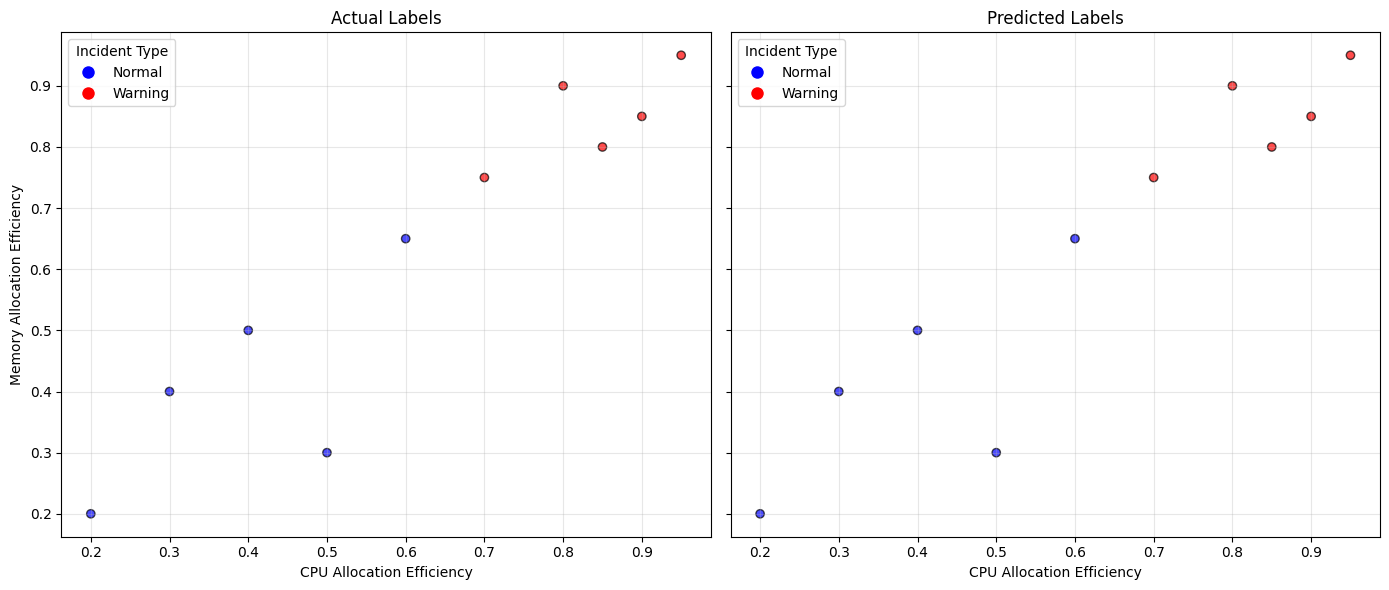

In [159]:
# Predict for the entire dataset
df_simple["predicted_event"] = simple_tree.predict(X)

# %%
# Map actual and predicted labels to colors
color_map = {"Normal": "blue", "Warning": "red"}

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot actual labels
axes[0].scatter(
    df_simple["cpu_allocation_efficiency"],
    df_simple["memory_allocation_efficiency"],
    c=df_simple["event_type"].map(color_map),
    edgecolor="k",
    alpha=0.7,
)
axes[0].set_title("Actual Labels")
axes[0].set_xlabel("CPU Allocation Efficiency")
axes[0].set_ylabel("Memory Allocation Efficiency")
axes[0].grid(alpha=0.3)

# Plot predicted labels
axes[1].scatter(
    df_simple["cpu_allocation_efficiency"],
    df_simple["memory_allocation_efficiency"],
    c=df_simple["predicted_event"].map(color_map),
    edgecolor="k",
    alpha=0.7,
)
axes[1].set_title("Predicted Labels")
axes[1].set_xlabel("CPU Allocation Efficiency")
axes[1].grid(alpha=0.3)

# Add legends
for ax in axes:
    ax.legend(
        handles=[
            plt.Line2D(
                [0],
                [0],
                marker="o",
                color="w",
                label="Normal",
                markerfacecolor="blue",
                markersize=10,
            ),
            plt.Line2D(
                [0],
                [0],
                marker="o",
                color="w",
                label="Warning",
                markerfacecolor="red",
                markersize=10,
            ),
        ],
        title="Incident Type",
    )

plt.tight_layout()
plt.show()

### 6.2. Visualizing Model Performance: Confusion Matrix

A confusion matrix shows the number of correct and incorrect predictions made by the model, broken down by each class (e.g., `Normal` and `Warning`).

- **True Positives (TP):** Correctly predicted `Normal`.
- **True Negatives (TN):** Correctly predicted `Warning`.
- **False Positives (FP):** Incorrectly predicted `Normal` when it was `Warning`.
- **False Negatives (FN):** Incorrectly predicted `Warning` when it was `Normal`.


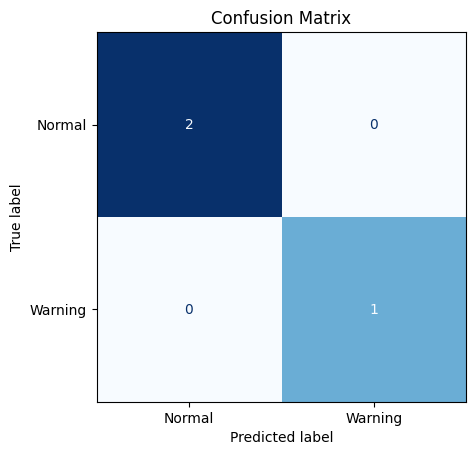

In [160]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(
    simple_tree,
    X_test,
    y_test,
    display_labels=["Normal", "Warning"],
    cmap="Blues",
    colorbar=False,
)
plt.title("Confusion Matrix")
plt.show()

## 7. Loading the Preprocessed Dataset

We’ll use the provided dataset to predict Kubernetes incidents (`event_type`) based on metrics such as CPU allocation efficiency, memory allocation efficiency, and other operational data.

### Dataset Columns:
1. **Features**:
   - `cpu_allocation_efficiency`, `memory_allocation_efficiency`
   - `disk_io`, `network_latency`, `node_temperature`, `node_cpu_usage`, `node_memory_usage`
   - Derived features: `resource_efficiency`, `io_latency_ratio`, etc.
2. **Target**:
   - `event_type`: Indicates the type of incident (`Normal`, `Warning`, or `Error`).
3. **Other Columns**:
   - Metadata like `timestamp`, `namespace`, and `pod_name`.
   - These may not directly contribute to prediction and will be excluded.

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Load the dataset
df = pd.read_csv("data/preprocessed_kubernetes_data.csv")

# Display the first few rows to understand the structure
df.head()

,timestamp,pod_name,namespace,cpu_allocation_efficiency,memory_allocation_efficiency,disk_io,network_latency,node_temperature,node_cpu_usage,node_memory_usage,event_type,event_message,scaling_event,pod_lifetime_seconds,hour,day_of_week,resource_efficiency,io_latency_ratio
0,2023-01-01 00:00:00,pod_0,dev,0.038162,0.949259,10.770664,13.722542,77.619073,93.177619,37.900532,Warning,Killed,False,119648.0,0,6,0.493711,0.678794
1,2023-01-01 00:00:00,pod_1,default,0.500763,0.048543,935.792442,55.493953,84.182245,61.442289,5.208161,Error,Failed,True,144516.0,0,6,0.274653,16.564471
2,2023-01-01 00:00:00,pod_2,kube-system,0.746726,0.447345,328.352359,173.910016,21.295244,55.819311,18.335802,Normal,Completed,True,68857.0,0,6,0.597035,1.877264
3,2023-01-01 00:00:00,pod_3,default,0.526692,0.870251,778.297708,67.395729,85.028829,78.968463,94.619689,Warning,OOMKilled,True,72080.0,0,6,0.698472,11.379332
4,2023-01-01 00:00:00,pod_4,prod,0.425342,0.885459,711.181295,91.724730,29.157695,52.718141,70.770594,Error,Killed,False,123016.0,0,6,0.655401,7.669813


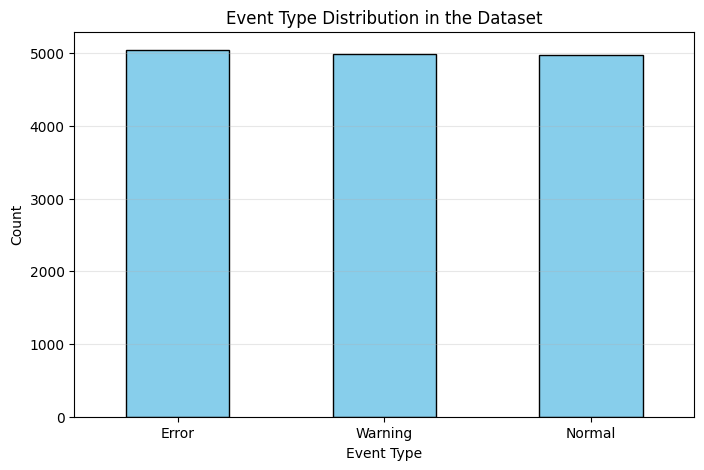

In [162]:
# Count the occurrences of each event type in the dataset
event_counts = df["event_type"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
event_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Event Type Distribution in the Dataset")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()

## 8. Selecting Features and Target Variable

From the dataset, we’ll:
1. Use only numerical columns for prediction (e.g., CPU and memory metrics).
2. Drop unnecessary metadata such as `timestamp`, `pod_name`, and `namespace`.

### Target Variable:
- The column `event_type` contains the incident labels (`Normal`, `Warning`, or `Error`).

In [163]:
# Define features (X) and target (y)
X = df[
    [
        "cpu_allocation_efficiency",
        "memory_allocation_efficiency",
        "disk_io",
        "network_latency",
        "node_temperature",
        "node_cpu_usage",
        "node_memory_usage",
        "resource_efficiency",
        "io_latency_ratio",
    ]
]
y = df["event_type"]

# Display the shapes of X and y
print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")

Features Shape: (15000, 9)
Target Shape: (15000,)


## 9. Splitting the Data: Training and Testing Sets

To evaluate the model, we’ll split the data into:
- **Training Set (70%)**: Used to train the model.
- **Testing Set (30%)**: Used to evaluate its performance.

This ensures the model is trained and tested on different data, avoiding overfitting.

In [164]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Display sizes of the training and testing sets
print(f"Training Set Size: {X_train.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")

Training Set Size: 10500
Testing Set Size: 4500


## 10. Training a Simple Decision Tree Model

We’ll use a **Decision Tree Classifier** to predict incidents. Decision trees are easy to interpret and work well with structured data like this dataset.

In [165]:
# Train the Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test)

# Display model accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.33


## 11. Evaluating the Model: Confusion Matrix

The confusion matrix visualizes the model’s performance by comparing:
- Actual labels (`y_test`) and predicted labels (`y_pred`).

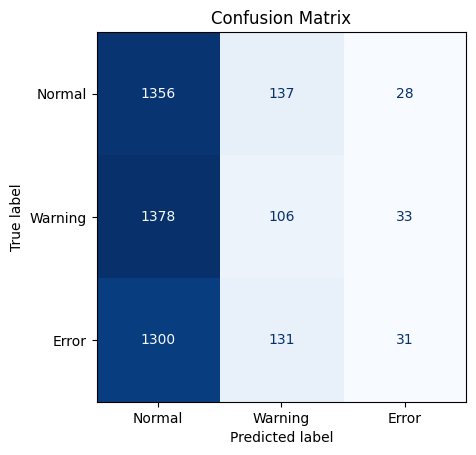

In [166]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(
    tree_model,
    X_test,
    y_test,
    display_labels=["Normal", "Warning", "Error"],
    cmap="Blues",
    colorbar=False,
)
plt.title("Confusion Matrix")
plt.show()

## 12. Classification Report

The classification report provides additional metrics for each class:
1. **Precision**: How many predicted labels were correct.
2. **Recall**: How many actual labels were correctly predicted.
3. **F1-Score**: A balance between precision and recall.

In [167]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       Error       0.34      0.89      0.49      1521
      Normal       0.28      0.07      0.11      1517
     Warning       0.34      0.02      0.04      1462

    accuracy                           0.33      4500
   macro avg       0.32      0.33      0.21      4500
weighted avg       0.32      0.33      0.22      4500



## 13. Visualizing Results: Actual vs. Predicted Labels

This line chart compares the actual labels (`y_test`) with the predicted labels (`y_pred`). It helps identify:
- Where the model made correct predictions.
- Where the model made incorrect predictions.

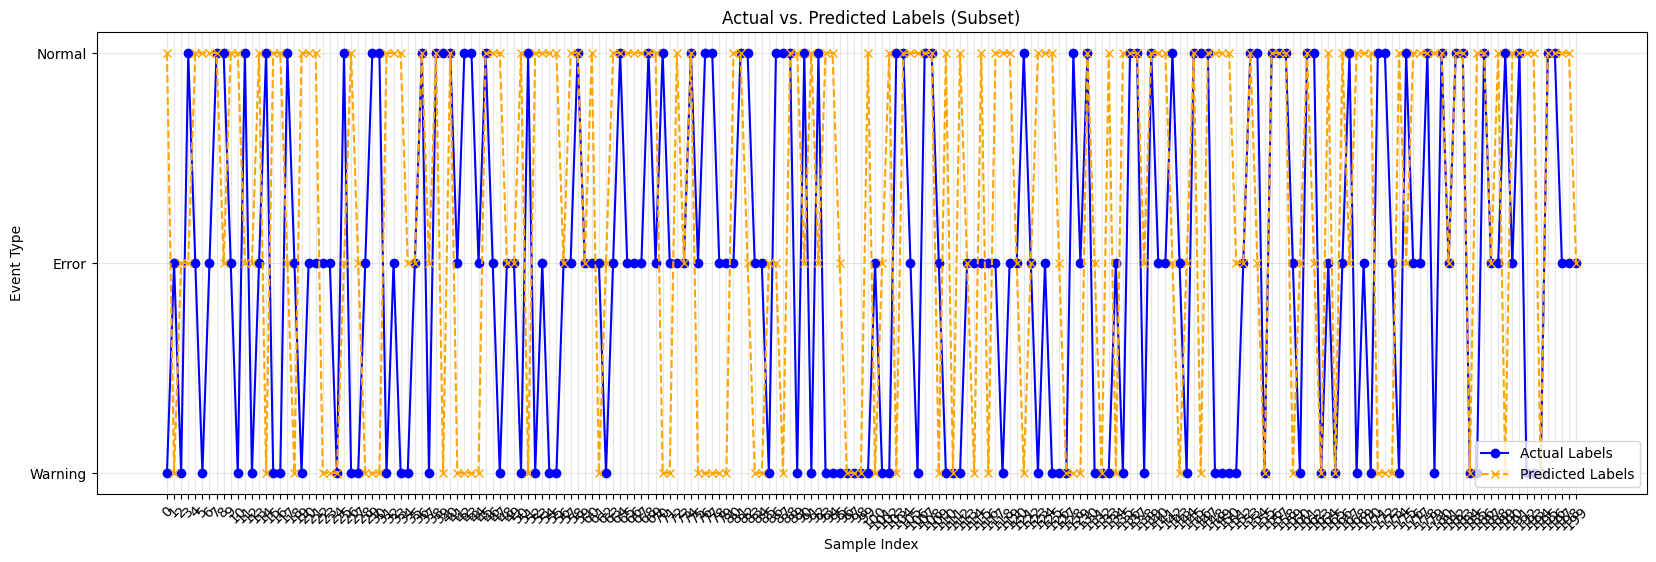

In [168]:
# Create a subset for visualization (e.g., first 50 samples)
subset = results_df.iloc[:200]

# Reset the index for clarity
subset = subset.reset_index()

# Plot actual vs. predicted labels for the subset
plt.figure(figsize=(20, 6))
plt.plot(
    subset.index,
    subset["Actual"],
    label="Actual Labels",
    marker="o",
    linestyle="-",
    color="blue",
)
plt.plot(
    subset.index,
    subset["Predicted"],
    label="Predicted Labels",
    marker="x",
    linestyle="--",
    color="orange",
)
plt.title("Actual vs. Predicted Labels (Subset)")
plt.xlabel("Sample Index")
plt.ylabel("Event Type")
plt.xticks(subset.index, labels=subset.index, rotation=45)
plt.yticks(range(len(y.unique())), labels=y.unique())
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 14. Training a Random Forest Classifier

A **Random Forest Classifier** is an ensemble method that trains multiple decision trees and combines their outputs to improve accuracy and reduce overfitting. 

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.33

Classification Report:
              precision    recall  f1-score   support

       Error       0.34      0.53      0.41      1521
      Normal       0.32      0.17      0.22      1517
     Warning       0.32      0.29      0.31      1462

    accuracy                           0.33      4500
   macro avg       0.33      0.33      0.31      4500
weighted avg       0.33      0.33      0.31      4500



## 15. Feature Importance

Understanding which features contribute most to the model’s predictions helps us:
- Identify critical metrics for operational health.
- Interpret the model’s decisions for real-world scenarios.

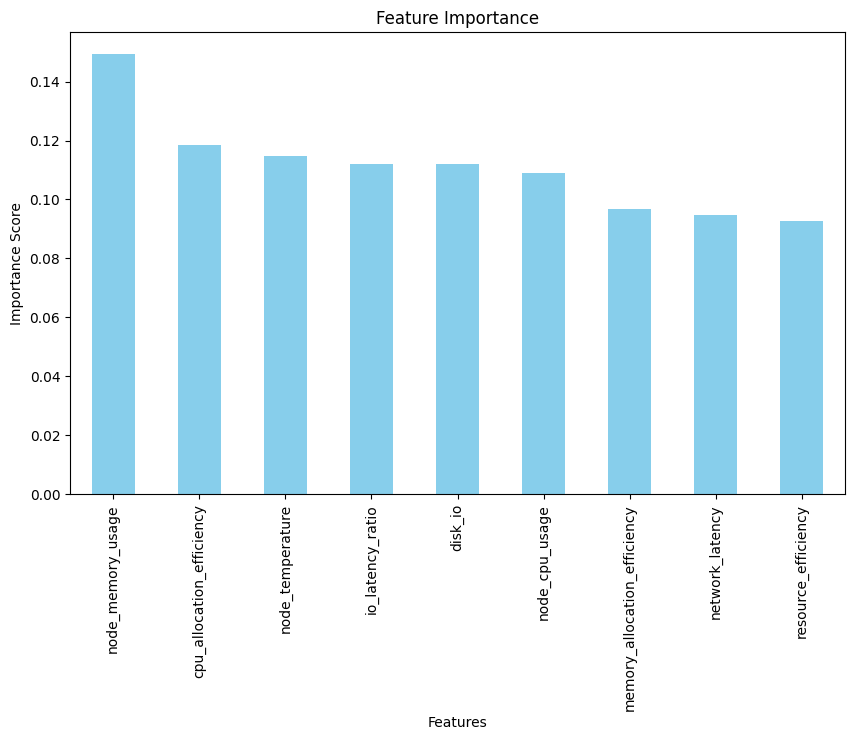

In [170]:
# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

## 16. Evaluating the Model

### Confusion Matrix

The confusion matrix visualizes the model’s performance by comparing:
- Actual labels (`y_test`) and predicted labels (`y_pred`).

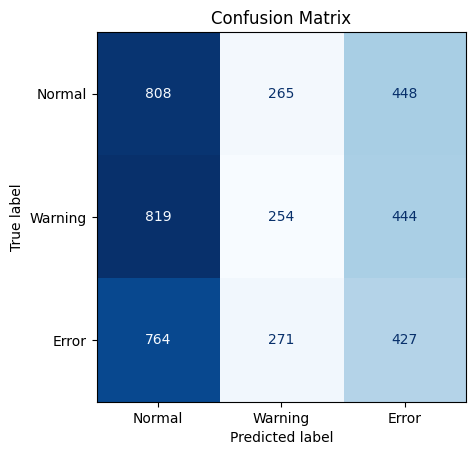

In [171]:
# Visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    rf_model,
    X_test,
    y_test,
    display_labels=["Normal", "Warning", "Error"],
    cmap="Blues",
    colorbar=False,
)
plt.title("Confusion Matrix")
plt.show()

### ROC Curve: Visualizing Classifier Performance

The **ROC Curve (Receiver Operating Characteristic)** evaluates the trade-off between the **True Positive Rate (TPR)** and **False Positive Rate (FPR)** for a binary classification model. It shows how well the model separates the positive and negative classes across different thresholds.

#### AUC (Area Under the Curve):
- The **AUC** represents the model’s ability to distinguish between classes.
- A perfect model has an AUC of **1.0**, while a random classifier has an AUC of **0.5**.

#### Key Terms:
1. **True Positive Rate (TPR)**: Sensitivity or recall.
   - Formula: `TPR = TP / (TP + FN)`
2. **False Positive Rate (FPR)**: Probability of falsely classifying negatives as positives.
   - Formula: `FPR = FP / (FP + TN)`

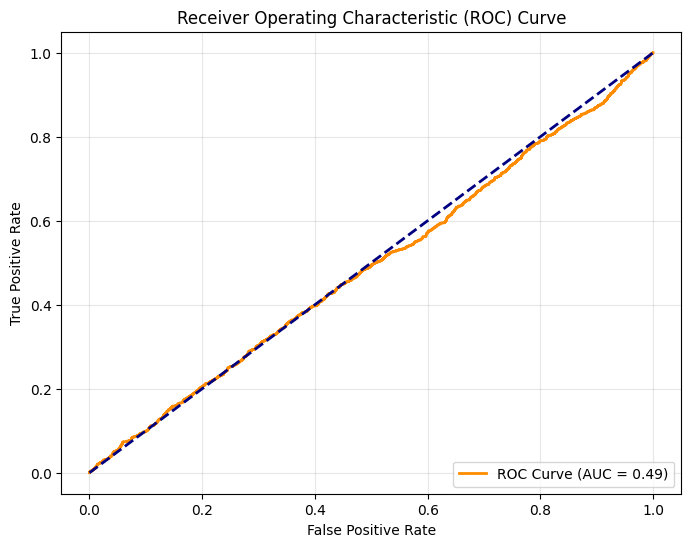

In [172]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the target variable if necessary
y_test_binary = label_binarize(y_test, classes=["Normal", "Warning", "Error"])

# Get probabilities for the positive class
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary[:, 1], y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## 17. Interactivity: Tune Model Parameters

Use the sliders below to adjust the model’s parameters (e.g., tree depth) and observe how it affects performance.

In [173]:
from ipywidgets import interact


# Interactive function to train and evaluate the model
def train_rf(max_depth, n_estimators):
    rf_model = RandomForestClassifier(
        random_state=42, max_depth=max_depth, n_estimators=n_estimators
    )
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


# Create sliders for parameters
interact(train_rf, max_depth=(2, 20, 1), n_estimators=(10, 200, 10))

interactive(children=(IntSlider(value=11, description='max_depth', max=20, min=2), IntSlider(value=100, descri…

<function __main__.train_rf(max_depth, n_estimators)>

## Conclusion

In this notebook, we introduced the basics of machine learning and trained a Random Forest Classifier to predict Kubernetes incidents. Key takeaways:
- **Supervised Learning**: Learn patterns from labeled data.
- **Random Forest**: A robust and interpretable model.
- **Feature Importance**: Insights into key metrics influencing predictions.

### What’s Next:
In the next notebook, we’ll explore more advanced techniques, including:
1. **Deep Learning**: Using LSTM/Transformers for time-series data.
2. **Generative AI**: Suggesting remediation actions based on incidents.